Importing The ImageDataGenerator Library

In [ ]:
import keras

In [ ]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 6.6 MB/s 


Import ImageDataGenerator from keras

In [14]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Defining the parameters

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

Applying ImageDataGenerator functionality to train dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/archive/Dataset/Dataset/train_set',target_size=(128,128),batch_size=32,class_mode='binary')

Found 439 images belonging to 2 classes.


Applying ImageDataGenerator functionality to test dataset

In [ ]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/archive/Dataset/Dataset/test_set',target_size=(128,128),batch_size=32,class_mode='binary')

Found 121 images belonging to 2 classes.


Importing Model Building Libraries

In [ ]:
#to define the linear Initialisation import sequential
from keras.models import Sequential
#to add layers import Dense
from keras.layers import Dense
#to create Convolutional kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer 
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

Initializing The Model

In [ ]:
model=Sequential()

Adding CNN Layers

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())

Adding Dense Layers

In [ ]:
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

Configuring The Learning Process

In [ ]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

Training The Model

In [13]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 89s 6s/step - loss: 2.4876 - accuracy: 0.6629 - val_loss: 0.7067 - val_accuracy: 0.8264
Epoch 2/10
14/14 [==============================] - 27s 2s/step - loss: 0.4245 - accuracy: 0.8656 - val_loss: 0.1071 - val_accuracy: 0.9752
Epoch 3/10
14/14 [==============================] - 25s 2s/step - loss: 0.1768 - accuracy: 0.9180 - val_loss: 0.0831 - val_accuracy: 0.9752
Epoch 4/10
14/14 [==============================] - 27s 2s/step - loss: 0.1711 - accuracy: 0.9180 - val_loss: 0.1012 - val_accuracy: 0.9752
Epoch 5/10
14/14 [==============================] - 26s 2s/step - loss: 0.1724 - accuracy: 0.9226 - val_loss: 0.1214 - val_accuracy: 0.9669
Epoch 6/10
14/14 [==============================] - 24s 2s/step - loss: 0.1756 - accuracy: 0.9157 - val_loss: 0.0691 - val_accuracy: 0.9752
Epoch 7/10
14/14 [==============================] - 24s 2s/step - loss: 0.1554 - accuracy: 0.9339 - val_loss: 0.0742 - val_accuracy: 0.9669
Epoch 8/10
14/14 [==

Save the model

In [15]:
model.save("forest.h5")

Predictions

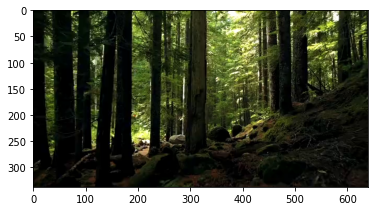

In [36]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model("/content/drive/MyDrive/archive/Dataset/Dataset/forest.h5")
img=image.load_img('/content/drive/MyDrive/archive/Dataset/Dataset/no fire.png')
plt.imshow(img)
plt.show()
x=image.img_to_array(img)
res=cv2.resize(x,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [34]:
pred=model.predict(x)
pred = int(pred[0][0])
pred
int(pred)

1/1 [==============================] - 0s 61ms/step


1

In [35]:
if pred==0:
  print('Forest fire')
  from twilio.rest import Client
  print('Forest fire')
  account_sid='AC34c4bee5e03df7bc7dba1eef29761275'
  auth_token='1fc522239435d0c251c1fd870d715295'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+19803934024',
      #to number
      to='+919962082226')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")
elif pred==1:
  print('No Fire')

No Fire
